<a href="https://colab.research.google.com/github/somesh-ghaturle/H2O/blob/master/demo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Checking for grpahics 
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!pip install h2o

     |████████████████████████████████| 129.4MB 78kB/s 
  Created wheel for h2o: filename=h2o-3.30.1.2-py2.py3-none-any.whl size=129446949 sha256=fc281820262e8843408916dc20922977aced3e0af782a1018e09fb72c18d2a34
  Stored in directory: /root/.cache/pip/wheels/c6/be/83/a33a3c1c97fce1d136222bf4ed6d79da405ef6103f5b434c1e
Successfully built h2o


In [ ]:
import h2o

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpiorvm9ou
  JVM stdout: /tmp/tmpiorvm9ou/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpiorvm9ou/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.2
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_etfk8k
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
churn_df = h2o.import_file('/content/Telco-Customer-Churn.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
churn_df.types

{'Churn': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'DeviceProtection': 'enum',
 'InternetService': 'enum',
 'MonthlyCharges': 'real',
 'MultipleLines': 'enum',
 'OnlineBackup': 'enum',
 'OnlineSecurity': 'enum',
 'PaperlessBilling': 'enum',
 'Partner': 'enum',
 'PaymentMethod': 'enum',
 'PhoneService': 'enum',
 'SeniorCitizen': 'int',
 'StreamingMovies': 'enum',
 'StreamingTV': 'enum',
 'TechSupport': 'enum',
 'TotalCharges': 'real',
 'customerID': 'string',
 'gender': 'enum',
 'tenure': 'int'}

In [ ]:
churn_df.describe()

Rows:7043
Cols:21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:

churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [ ]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [ ]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [ ]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
10:25:40.575: Project: AutoML_20200906_102540568
10:25:40.576: Cross-validation disabled by user: no fold column nor nfolds > 1.
10:25:40.577: Setting stopping tolerance adaptively based on the training frame: 0.014177624100166717
10:25:40.577: Build control seed: 10
10:25:40.577: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
10:25:40.702: training frame: Frame key: automl_training_py_2_sid_870a    cols: 21    rows: 4493  chunks: 8    size: 261258  checksum: -8305529063523054418
10:25:40.702: validation frame: Frame key: py_4_sid_870a    cols: 21    rows: 1059  chunks: 8    size: 103748  checksum: -5309952153894587518
10:25:40.709: leaderboard frame: Frame key: automl_leaderboard_py_2_sid_870a    cols: 21    rows: 482  chunks: 8    size: 89326  checksum: 5444514445512465172
10:25:40.710: blending frame: NULL
10:25:40.710: response column: Churn
1

In [ ]:
lb = aml.leaderboard

In [ ]:
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_5_AutoML_20200906_102540,0.853507,0.394916,0.627295,0.208922,0.356677,0.127218
GLM_1_AutoML_20200906_102540,0.849971,0.399154,0.616503,0.215221,0.359429,0.129189
GBM_1_AutoML_20200906_102540,0.843063,0.405163,0.610951,0.244585,0.363539,0.132161
GBM_4_AutoML_20200906_102540,0.837537,0.417045,0.59479,0.233462,0.365544,0.133622
GBM_3_AutoML_20200906_102540,0.83667,0.412875,0.611885,0.230617,0.365608,0.133669
GBM_2_AutoML_20200906_102540,0.83441,0.415182,0.595543,0.226016,0.367267,0.134885
DRF_1_AutoML_20200906_102540,0.831554,0.486091,0.588098,0.228369,0.369501,0.136531
XGBoost_2_AutoML_20200906_102540,0.830664,0.425428,0.597714,0.246119,0.369962,0.136872
XGBoost_3_AutoML_20200906_102540,0.830055,0.424074,0.586476,0.236752,0.370441,0.137227
XGBoost_1_AutoML_20200906_102540,0.81748,0.449791,0.564849,0.234891,0.377653,0.142622


In [ ]:
churn_pred=aml.leader.predict(churn_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [ ]:
churn_pred.head()

predict,No,Yes
No,0.981913,0.0180871
No,0.980083,0.0199166
No,0.741222,0.258778
Yes,0.203548,0.796452
No,0.960541,0.0394586
No,0.677552,0.322448
Yes,0.371226,0.628774
No,0.921814,0.0781859
No,0.9722,0.0278005
Yes,0.416333,0.583667


In [ ]:

aml.leader.model_performance(churn_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1258421055588828
RMSE: 0.35474230866769024
LogLoss: 0.3895911479980876
Mean Per-Class Error: 0.2054392618251314
AUC: 0.8717426142697882
AUCPR: 0.7059028879558621
Gini: 0.7434852285395763

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26046255084384423: 


,,No,Yes,Error,Rate
0,No,563.0,173.0,0.2351,(173.0/736.0)
1,Yes,48.0,225.0,0.1758,(48.0/273.0)
2,Total,611.0,398.0,0.219,(221.0/1009.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.260463,0.670641,226.0
1,max f2,0.211216,0.771465,253.0
2,max f0point5,0.569657,0.687569,98.0
3,max accuracy,0.569657,0.819623,98.0
4,max precision,0.900662,1.000000,0.0
5,max recall,0.030277,1.000000,377.0
6,max specificity,0.900662,1.000000,0.0
7,max absolute_mcc,0.260463,0.535504,226.0
8,max min_per_class_accuracy,0.287292,0.783967,213.0
9,max mean_per_class_accuracy,0.260463,0.794561,226.0



Gains/Lift Table: Avg response rate: 27.06 %, avg score: 26.45 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010902,0.871265,3.023976,3.023976,0.818182,0.882370,0.818182,0.882370,0.032967,0.032967,202.397602,202.397602,0.030250
1,2,0.020813,0.844042,3.326374,3.167975,0.900000,0.860606,0.857143,0.872006,0.032967,0.065934,232.637363,216.797488,0.061858
2,3,0.030723,0.826507,3.326374,3.219071,0.900000,0.838038,0.870968,0.861049,0.032967,0.098901,232.637363,221.907125,0.093466
3,4,0.040634,0.792570,3.326374,3.245243,0.900000,0.805169,0.878049,0.847419,0.032967,0.131868,232.637363,224.524256,0.125075
4,5,0.050545,0.769678,2.587179,3.116211,0.700000,0.780301,0.843137,0.834259,0.025641,0.157509,158.717949,211.621059,0.146640
5,6,0.100099,0.658383,2.808938,2.964095,0.760000,0.714786,0.801980,0.775114,0.139194,0.296703,180.893773,196.409531,0.269529
6,7,0.150644,0.589594,2.826331,2.917872,0.764706,0.621484,0.789474,0.723567,0.142857,0.439560,182.633053,191.787160,0.396082
7,8,0.200198,0.511521,1.774066,2.634751,0.480000,0.544063,0.712871,0.679135,0.087912,0.527473,77.406593,163.475139,0.448668
8,9,0.300297,0.365208,1.683313,2.317605,0.455446,0.434957,0.627063,0.597743,0.168498,0.695971,68.331339,131.760539,0.542438
9,10,0.400396,0.255338,1.317376,2.067548,0.356436,0.307252,0.559406,0.525120,0.131868,0.827839,31.737569,106.754796,0.585991


In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [ ]:
model_ids

['GBM_5_AutoML_20200906_102540',
 'GLM_1_AutoML_20200906_102540',
 'GBM_1_AutoML_20200906_102540',
 'GBM_4_AutoML_20200906_102540',
 'GBM_3_AutoML_20200906_102540',
 'GBM_2_AutoML_20200906_102540',
 'DRF_1_AutoML_20200906_102540',
 'XGBoost_2_AutoML_20200906_102540',
 'XGBoost_3_AutoML_20200906_102540',
 'XGBoost_1_AutoML_20200906_102540']

In [ ]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_20200906_102540


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.1056336662324498
RMSE: 0.3250133323918417
LogLoss: 0.3363281995114372
Mean Per-Class Error: 0.16946402287351559
AUC: 0.9090395168594454
AUCPR: 0.7957892526375355
Gini: 0.8180790337188908

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3559584447315761: 


,,No,Yes,Error,Rate
0,No,2829.0,455.0,0.1386,(455.0/3284.0)
1,Yes,250.0,959.0,0.2068,(250.0/1209.0)
2,Total,3079.0,1414.0,0.1569,(705.0/4493.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.355958,0.731224,211.0
1,max f2,0.199199,0.807299,274.0
2,max f0point5,0.548440,0.740780,140.0
3,max accuracy,0.483662,0.852215,161.0
4,max precision,0.973229,1.000000,0.0
5,max recall,0.015983,1.000000,388.0
6,max specificity,0.973229,1.000000,0.0
7,max absolute_mcc,0.355958,0.625181,211.0
8,max min_per_class_accuracy,0.313873,0.829172,227.0
9,max mean_per_class_accuracy,0.268998,0.830536,245.0



Gains/Lift Table: Avg response rate: 26.91 %, avg score: 26.92 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010238,0.920701,3.716294,3.716294,1.000000,0.935996,1.000000,0.935996,0.038048,0.038048,271.629446,271.629446,0.038048
1,2,0.020031,0.898221,3.293988,3.509834,0.886364,0.907639,0.944444,0.922133,0.032258,0.070306,229.398827,250.983365,0.068784
2,3,0.030047,0.879606,3.633710,3.551126,0.977778,0.888976,0.955556,0.911080,0.036394,0.106700,263.371014,255.112582,0.104873
3,4,0.040285,0.860258,3.635505,3.572570,0.978261,0.869360,0.961326,0.900477,0.037221,0.143921,263.550545,257.257036,0.141789
4,5,0.050078,0.833013,3.293988,3.518092,0.886364,0.844432,0.946667,0.889517,0.032258,0.176179,229.398827,251.809209,0.172525
5,6,0.100156,0.726448,3.253822,3.385957,0.875556,0.780551,0.911111,0.835034,0.162945,0.339123,225.382226,238.595717,0.326943
6,7,0.150011,0.630865,2.671087,3.148374,0.718750,0.677673,0.847181,0.782736,0.133168,0.472291,167.108664,214.837409,0.440927
7,8,0.200089,0.541487,2.279327,2.930871,0.613333,0.585620,0.788654,0.733402,0.114144,0.586435,127.932727,193.087071,0.528579
8,9,0.300022,0.369200,1.787794,2.550128,0.481069,0.449992,0.686202,0.639002,0.178660,0.765095,78.779422,155.012787,0.636289
9,10,0.399955,0.252491,1.117371,2.192138,0.300668,0.309224,0.589872,0.556604,0.111663,0.876758,11.737138,119.213808,0.652336




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.14571521491659364
RMSE: 0.3817266232745545
LogLoss: 0.4434604816144599
Mean Per-Class Error: 0.2595479509928179
AUC: 0.8209313242266347
AUCPR: 0.6144634421340566
Gini: 0.6418626484532695

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32702695578336716: 


,,No,Yes,Error,Rate
0,No,602.0,187.0,0.237,(187.0/789.0)
1,Yes,79.0,191.0,0.2926,(79.0/270.0)
2,Total,681.0,378.0,0.2512,(266.0/1059.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.327027,0.589506,213.0
1,max f2,0.086591,0.731078,328.0
2,max f0point5,0.637044,0.607375,101.0
3,max accuracy,0.637044,0.802644,101.0
4,max precision,0.954214,1.000000,0.0
5,max recall,0.011764,1.000000,390.0
6,max specificity,0.954214,1.000000,0.0
7,max absolute_mcc,0.487345,0.431782,149.0
8,max min_per_class_accuracy,0.299399,0.729630,226.0
9,max mean_per_class_accuracy,0.240512,0.740452,248.0



Gains/Lift Table: Avg response rate: 25.50 %, avg score: 27.84 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010387,0.927797,3.922222,3.922222,1.000000,0.940983,1.000000,0.940983,0.040741,0.040741,292.222222,292.222222,0.040741
1,2,0.020774,0.904772,3.209091,3.565657,0.818182,0.914904,0.909091,0.927943,0.033333,0.074074,220.909091,256.565657,0.071539
2,3,0.030217,0.884149,2.353333,3.186806,0.600000,0.895414,0.812500,0.917778,0.022222,0.096296,135.333333,218.680556,0.088692
3,4,0.041549,0.871478,2.941667,3.119949,0.750000,0.877093,0.795455,0.906682,0.033333,0.129630,194.166667,211.994949,0.118223
4,5,0.050047,0.843183,3.050617,3.108176,0.777778,0.855507,0.792453,0.897992,0.025926,0.155556,205.061728,210.817610,0.141614
5,6,0.100094,0.736003,2.220126,2.664151,0.566038,0.791770,0.679245,0.844881,0.111111,0.266667,122.012579,166.415094,0.223574
6,7,0.150142,0.639367,2.664151,2.664151,0.679245,0.689251,0.679245,0.793004,0.133333,0.400000,166.415094,166.415094,0.335361
7,8,0.200189,0.552414,1.776101,2.442138,0.452830,0.594625,0.622642,0.743409,0.088889,0.488889,77.610063,144.213836,0.387495
8,9,0.300283,0.390561,1.406080,2.096785,0.358491,0.459677,0.534591,0.648832,0.140741,0.629630,40.607966,109.678546,0.442050
9,10,0.400378,0.282670,1.110063,1.850105,0.283019,0.334006,0.471698,0.570125,0.111111,0.740741,11.006289,85.010482,0.456837




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-09-06 10:25:45,0.004 sec,0.0,0.500000,0.693147,0.500000,0.269085,1.000000,0.730915,0.500000,0.693147,0.500000,0.254958,1.000000,0.745042
1,,2020-09-06 10:25:45,0.300 sec,5.0,0.365644,0.427614,0.867253,0.701858,3.479084,0.199199,0.377739,0.448666,0.831688,0.626637,3.595370,0.211520
2,,2020-09-06 10:25:45,0.555 sec,10.0,0.348664,0.382640,0.879696,0.734094,3.633710,0.191854,0.372471,0.427413,0.832481,0.625456,3.209091,0.239849
3,,2020-09-06 10:25:45,0.766 sec,15.0,0.341994,0.366887,0.888955,0.753044,3.635505,0.171600,0.373578,0.429401,0.828836,0.634228,3.922222,0.249292
4,,2020-09-06 10:25:46,0.990 sec,20.0,0.335299,0.354251,0.896195,0.770756,3.633710,0.172045,0.378508,0.437757,0.824248,0.624746,3.922222,0.245515
5,,2020-09-06 10:25:46,1.234 sec,25.0,0.330182,0.345643,0.902398,0.783569,3.716294,0.170042,0.380457,0.440973,0.822297,0.616358,3.565657,0.247403
6,,2020-09-06 10:25:46,1.511 sec,30.0,0.325013,0.336328,0.909040,0.795789,3.716294,0.156911,0.381727,0.443460,0.820931,0.614463,3.922222,0.251180



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TotalCharges,650.799377,1.000000,0.185866
1,Contract.Month-to-month,518.934814,0.797381,0.148206
2,MonthlyCharges,489.972137,0.752877,0.139934
3,tenure,379.704590,0.583443,0.108442
4,TechSupport.No,163.226318,0.250809,0.046617
5,OnlineSecurity.No,160.005997,0.245861,0.045697
6,PaymentMethod.Electronic check,136.495056,0.209734,0.038982
7,InternetService.Fiber optic,135.677063,0.208478,0.038749
8,Contract.Two year,129.657166,0.199228,0.037030
9,gender.Female,66.246849,0.101793,0.018920



See the whole table with table.as_data_frame()


In [ ]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [ ]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_20200906_102540


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.1056336662324498
RMSE: 0.3250133323918417
LogLoss: 0.3363281995114372
Mean Per-Class Error: 0.16946402287351559
AUC: 0.9090395168594454
AUCPR: 0.7957892526375355
Gini: 0.8180790337188908

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3559584447315761: 


,,No,Yes,Error,Rate
0,No,2829.0,455.0,0.1386,(455.0/3284.0)
1,Yes,250.0,959.0,0.2068,(250.0/1209.0)
2,Total,3079.0,1414.0,0.1569,(705.0/4493.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.355958,0.731224,211.0
1,max f2,0.199199,0.807299,274.0
2,max f0point5,0.548440,0.740780,140.0
3,max accuracy,0.483662,0.852215,161.0
4,max precision,0.973229,1.000000,0.0
5,max recall,0.015983,1.000000,388.0
6,max specificity,0.973229,1.000000,0.0
7,max absolute_mcc,0.355958,0.625181,211.0
8,max min_per_class_accuracy,0.313873,0.829172,227.0
9,max mean_per_class_accuracy,0.268998,0.830536,245.0



Gains/Lift Table: Avg response rate: 26.91 %, avg score: 26.92 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010238,0.920701,3.716294,3.716294,1.000000,0.935996,1.000000,0.935996,0.038048,0.038048,271.629446,271.629446,0.038048
1,2,0.020031,0.898221,3.293988,3.509834,0.886364,0.907639,0.944444,0.922133,0.032258,0.070306,229.398827,250.983365,0.068784
2,3,0.030047,0.879606,3.633710,3.551126,0.977778,0.888976,0.955556,0.911080,0.036394,0.106700,263.371014,255.112582,0.104873
3,4,0.040285,0.860258,3.635505,3.572570,0.978261,0.869360,0.961326,0.900477,0.037221,0.143921,263.550545,257.257036,0.141789
4,5,0.050078,0.833013,3.293988,3.518092,0.886364,0.844432,0.946667,0.889517,0.032258,0.176179,229.398827,251.809209,0.172525
5,6,0.100156,0.726448,3.253822,3.385957,0.875556,0.780551,0.911111,0.835034,0.162945,0.339123,225.382226,238.595717,0.326943
6,7,0.150011,0.630865,2.671087,3.148374,0.718750,0.677673,0.847181,0.782736,0.133168,0.472291,167.108664,214.837409,0.440927
7,8,0.200089,0.541487,2.279327,2.930871,0.613333,0.585620,0.788654,0.733402,0.114144,0.586435,127.932727,193.087071,0.528579
8,9,0.300022,0.369200,1.787794,2.550128,0.481069,0.449992,0.686202,0.639002,0.178660,0.765095,78.779422,155.012787,0.636289
9,10,0.399955,0.252491,1.117371,2.192138,0.300668,0.309224,0.589872,0.556604,0.111663,0.876758,11.737138,119.213808,0.652336




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.14571521491659364
RMSE: 0.3817266232745545
LogLoss: 0.4434604816144599
Mean Per-Class Error: 0.2595479509928179
AUC: 0.8209313242266347
AUCPR: 0.6144634421340566
Gini: 0.6418626484532695

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32702695578336716: 


,,No,Yes,Error,Rate
0,No,602.0,187.0,0.237,(187.0/789.0)
1,Yes,79.0,191.0,0.2926,(79.0/270.0)
2,Total,681.0,378.0,0.2512,(266.0/1059.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.327027,0.589506,213.0
1,max f2,0.086591,0.731078,328.0
2,max f0point5,0.637044,0.607375,101.0
3,max accuracy,0.637044,0.802644,101.0
4,max precision,0.954214,1.000000,0.0
5,max recall,0.011764,1.000000,390.0
6,max specificity,0.954214,1.000000,0.0
7,max absolute_mcc,0.487345,0.431782,149.0
8,max min_per_class_accuracy,0.299399,0.729630,226.0
9,max mean_per_class_accuracy,0.240512,0.740452,248.0



Gains/Lift Table: Avg response rate: 25.50 %, avg score: 27.84 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010387,0.927797,3.922222,3.922222,1.000000,0.940983,1.000000,0.940983,0.040741,0.040741,292.222222,292.222222,0.040741
1,2,0.020774,0.904772,3.209091,3.565657,0.818182,0.914904,0.909091,0.927943,0.033333,0.074074,220.909091,256.565657,0.071539
2,3,0.030217,0.884149,2.353333,3.186806,0.600000,0.895414,0.812500,0.917778,0.022222,0.096296,135.333333,218.680556,0.088692
3,4,0.041549,0.871478,2.941667,3.119949,0.750000,0.877093,0.795455,0.906682,0.033333,0.129630,194.166667,211.994949,0.118223
4,5,0.050047,0.843183,3.050617,3.108176,0.777778,0.855507,0.792453,0.897992,0.025926,0.155556,205.061728,210.817610,0.141614
5,6,0.100094,0.736003,2.220126,2.664151,0.566038,0.791770,0.679245,0.844881,0.111111,0.266667,122.012579,166.415094,0.223574
6,7,0.150142,0.639367,2.664151,2.664151,0.679245,0.689251,0.679245,0.793004,0.133333,0.400000,166.415094,166.415094,0.335361
7,8,0.200189,0.552414,1.776101,2.442138,0.452830,0.594625,0.622642,0.743409,0.088889,0.488889,77.610063,144.213836,0.387495
8,9,0.300283,0.390561,1.406080,2.096785,0.358491,0.459677,0.534591,0.648832,0.140741,0.629630,40.607966,109.678546,0.442050
9,10,0.400378,0.282670,1.110063,1.850105,0.283019,0.334006,0.471698,0.570125,0.111111,0.740741,11.006289,85.010482,0.456837




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-09-06 10:25:45,0.004 sec,0.0,0.500000,0.693147,0.500000,0.269085,1.000000,0.730915,0.500000,0.693147,0.500000,0.254958,1.000000,0.745042
1,,2020-09-06 10:25:45,0.300 sec,5.0,0.365644,0.427614,0.867253,0.701858,3.479084,0.199199,0.377739,0.448666,0.831688,0.626637,3.595370,0.211520
2,,2020-09-06 10:25:45,0.555 sec,10.0,0.348664,0.382640,0.879696,0.734094,3.633710,0.191854,0.372471,0.427413,0.832481,0.625456,3.209091,0.239849
3,,2020-09-06 10:25:45,0.766 sec,15.0,0.341994,0.366887,0.888955,0.753044,3.635505,0.171600,0.373578,0.429401,0.828836,0.634228,3.922222,0.249292
4,,2020-09-06 10:25:46,0.990 sec,20.0,0.335299,0.354251,0.896195,0.770756,3.633710,0.172045,0.378508,0.437757,0.824248,0.624746,3.922222,0.245515
5,,2020-09-06 10:25:46,1.234 sec,25.0,0.330182,0.345643,0.902398,0.783569,3.716294,0.170042,0.380457,0.440973,0.822297,0.616358,3.565657,0.247403
6,,2020-09-06 10:25:46,1.511 sec,30.0,0.325013,0.336328,0.909040,0.795789,3.716294,0.156911,0.381727,0.443460,0.820931,0.614463,3.922222,0.251180



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TotalCharges,650.799377,1.000000,0.185866
1,Contract.Month-to-month,518.934814,0.797381,0.148206
2,MonthlyCharges,489.972137,0.752877,0.139934
3,tenure,379.704590,0.583443,0.108442
4,TechSupport.No,163.226318,0.250809,0.046617
5,OnlineSecurity.No,160.005997,0.245861,0.045697
6,PaymentMethod.Electronic check,136.495056,0.209734,0.038982
7,InternetService.Fiber optic,135.677063,0.208478,0.038749
8,Contract.Two year,129.657166,0.199228,0.037030
9,gender.Female,66.246849,0.101793,0.018920



See the whole table with table.as_data_frame()


In [ ]:
out.params

{'backend': {'actual': 'cpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'bernoulli',
  'default': 'AUTO',
  'input': 'bernoulli'},
 'dmatrix_type': {'actual': 'dense', 'defa

In [ ]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_delta_step': 0.0,
  'max_depth': 20,
  'min_child_weight': 10.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 11,
  'silent': True,
  'subsample': 0.6,
  'tree_method': 'exact'},
 10000)

In [ ]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_20200906_102540


Model Summary: 


,,number_of_trees
0,,30.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.1056336662324498
RMSE: 0.3250133323918417
LogLoss: 0.3363281995114372
Mean Per-Class Error: 0.16946402287351559
AUC: 0.9090395168594454
AUCPR: 0.7957892526375355
Gini: 0.8180790337188908

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3559584447315761: 


,,No,Yes,Error,Rate
0,No,2829.0,455.0,0.1386,(455.0/3284.0)
1,Yes,250.0,959.0,0.2068,(250.0/1209.0)
2,Total,3079.0,1414.0,0.1569,(705.0/4493.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.355958,0.731224,211.0
1,max f2,0.199199,0.807299,274.0
2,max f0point5,0.548440,0.740780,140.0
3,max accuracy,0.483662,0.852215,161.0
4,max precision,0.973229,1.000000,0.0
5,max recall,0.015983,1.000000,388.0
6,max specificity,0.973229,1.000000,0.0
7,max absolute_mcc,0.355958,0.625181,211.0
8,max min_per_class_accuracy,0.313873,0.829172,227.0
9,max mean_per_class_accuracy,0.268998,0.830536,245.0



Gains/Lift Table: Avg response rate: 26.91 %, avg score: 26.92 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010238,0.920701,3.716294,3.716294,1.000000,0.935996,1.000000,0.935996,0.038048,0.038048,271.629446,271.629446,0.038048
1,2,0.020031,0.898221,3.293988,3.509834,0.886364,0.907639,0.944444,0.922133,0.032258,0.070306,229.398827,250.983365,0.068784
2,3,0.030047,0.879606,3.633710,3.551126,0.977778,0.888976,0.955556,0.911080,0.036394,0.106700,263.371014,255.112582,0.104873
3,4,0.040285,0.860258,3.635505,3.572570,0.978261,0.869360,0.961326,0.900477,0.037221,0.143921,263.550545,257.257036,0.141789
4,5,0.050078,0.833013,3.293988,3.518092,0.886364,0.844432,0.946667,0.889517,0.032258,0.176179,229.398827,251.809209,0.172525
5,6,0.100156,0.726448,3.253822,3.385957,0.875556,0.780551,0.911111,0.835034,0.162945,0.339123,225.382226,238.595717,0.326943
6,7,0.150011,0.630865,2.671087,3.148374,0.718750,0.677673,0.847181,0.782736,0.133168,0.472291,167.108664,214.837409,0.440927
7,8,0.200089,0.541487,2.279327,2.930871,0.613333,0.585620,0.788654,0.733402,0.114144,0.586435,127.932727,193.087071,0.528579
8,9,0.300022,0.369200,1.787794,2.550128,0.481069,0.449992,0.686202,0.639002,0.178660,0.765095,78.779422,155.012787,0.636289
9,10,0.399955,0.252491,1.117371,2.192138,0.300668,0.309224,0.589872,0.556604,0.111663,0.876758,11.737138,119.213808,0.652336




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.14571521491659364
RMSE: 0.3817266232745545
LogLoss: 0.4434604816144599
Mean Per-Class Error: 0.2595479509928179
AUC: 0.8209313242266347
AUCPR: 0.6144634421340566
Gini: 0.6418626484532695

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32702695578336716: 


,,No,Yes,Error,Rate
0,No,602.0,187.0,0.237,(187.0/789.0)
1,Yes,79.0,191.0,0.2926,(79.0/270.0)
2,Total,681.0,378.0,0.2512,(266.0/1059.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.327027,0.589506,213.0
1,max f2,0.086591,0.731078,328.0
2,max f0point5,0.637044,0.607375,101.0
3,max accuracy,0.637044,0.802644,101.0
4,max precision,0.954214,1.000000,0.0
5,max recall,0.011764,1.000000,390.0
6,max specificity,0.954214,1.000000,0.0
7,max absolute_mcc,0.487345,0.431782,149.0
8,max min_per_class_accuracy,0.299399,0.729630,226.0
9,max mean_per_class_accuracy,0.240512,0.740452,248.0



Gains/Lift Table: Avg response rate: 25.50 %, avg score: 27.84 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010387,0.927797,3.922222,3.922222,1.000000,0.940983,1.000000,0.940983,0.040741,0.040741,292.222222,292.222222,0.040741
1,2,0.020774,0.904772,3.209091,3.565657,0.818182,0.914904,0.909091,0.927943,0.033333,0.074074,220.909091,256.565657,0.071539
2,3,0.030217,0.884149,2.353333,3.186806,0.600000,0.895414,0.812500,0.917778,0.022222,0.096296,135.333333,218.680556,0.088692
3,4,0.041549,0.871478,2.941667,3.119949,0.750000,0.877093,0.795455,0.906682,0.033333,0.129630,194.166667,211.994949,0.118223
4,5,0.050047,0.843183,3.050617,3.108176,0.777778,0.855507,0.792453,0.897992,0.025926,0.155556,205.061728,210.817610,0.141614
5,6,0.100094,0.736003,2.220126,2.664151,0.566038,0.791770,0.679245,0.844881,0.111111,0.266667,122.012579,166.415094,0.223574
6,7,0.150142,0.639367,2.664151,2.664151,0.679245,0.689251,0.679245,0.793004,0.133333,0.400000,166.415094,166.415094,0.335361
7,8,0.200189,0.552414,1.776101,2.442138,0.452830,0.594625,0.622642,0.743409,0.088889,0.488889,77.610063,144.213836,0.387495
8,9,0.300283,0.390561,1.406080,2.096785,0.358491,0.459677,0.534591,0.648832,0.140741,0.629630,40.607966,109.678546,0.442050
9,10,0.400378,0.282670,1.110063,1.850105,0.283019,0.334006,0.471698,0.570125,0.111111,0.740741,11.006289,85.010482,0.456837




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-09-06 10:25:45,0.004 sec,0.0,0.500000,0.693147,0.500000,0.269085,1.000000,0.730915,0.500000,0.693147,0.500000,0.254958,1.000000,0.745042
1,,2020-09-06 10:25:45,0.300 sec,5.0,0.365644,0.427614,0.867253,0.701858,3.479084,0.199199,0.377739,0.448666,0.831688,0.626637,3.595370,0.211520
2,,2020-09-06 10:25:45,0.555 sec,10.0,0.348664,0.382640,0.879696,0.734094,3.633710,0.191854,0.372471,0.427413,0.832481,0.625456,3.209091,0.239849
3,,2020-09-06 10:25:45,0.766 sec,15.0,0.341994,0.366887,0.888955,0.753044,3.635505,0.171600,0.373578,0.429401,0.828836,0.634228,3.922222,0.249292
4,,2020-09-06 10:25:46,0.990 sec,20.0,0.335299,0.354251,0.896195,0.770756,3.633710,0.172045,0.378508,0.437757,0.824248,0.624746,3.922222,0.245515
5,,2020-09-06 10:25:46,1.234 sec,25.0,0.330182,0.345643,0.902398,0.783569,3.716294,0.170042,0.380457,0.440973,0.822297,0.616358,3.565657,0.247403
6,,2020-09-06 10:25:46,1.511 sec,30.0,0.325013,0.336328,0.909040,0.795789,3.716294,0.156911,0.381727,0.443460,0.820931,0.614463,3.922222,0.251180



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TotalCharges,650.799377,1.000000,0.185866
1,Contract.Month-to-month,518.934814,0.797381,0.148206
2,MonthlyCharges,489.972137,0.752877,0.139934
3,tenure,379.704590,0.583443,0.108442
4,TechSupport.No,163.226318,0.250809,0.046617
5,OnlineSecurity.No,160.005997,0.245861,0.045697
6,PaymentMethod.Electronic check,136.495056,0.209734,0.038982
7,InternetService.Fiber optic,135.677063,0.208478,0.038749
8,Contract.Two year,129.657166,0.199228,0.037030
9,gender.Female,66.246849,0.101793,0.018920



See the whole table with table.as_data_frame()


In [ ]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [ ]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3559584447315761: 


,,No,Yes,Error,Rate
0,No,2829.0,455.0,0.1386,(455.0/3284.0)
1,Yes,250.0,959.0,0.2068,(250.0/1209.0)
2,Total,3079.0,1414.0,0.1569,(705.0/4493.0)


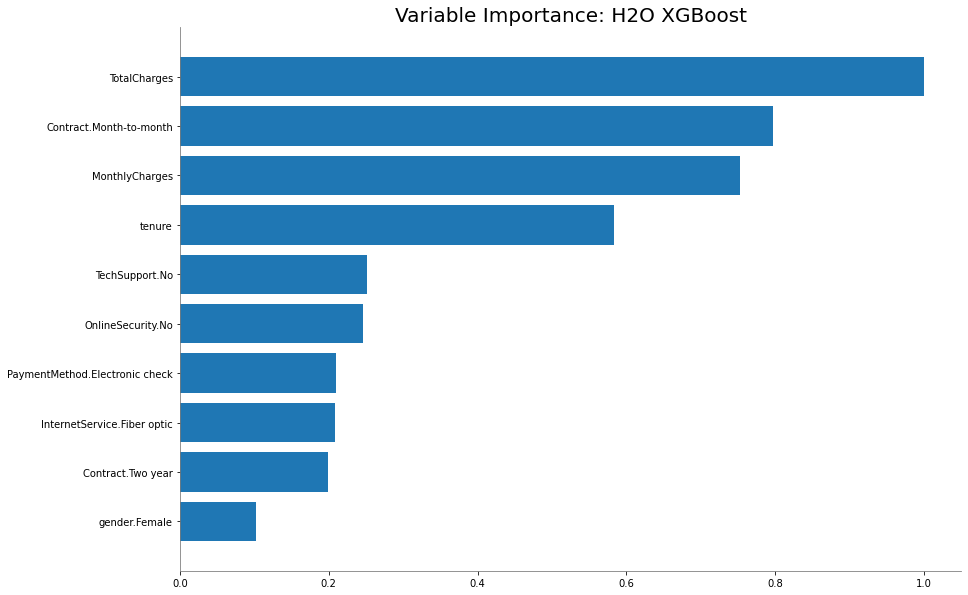

In [ ]:
out.varimp_plot()

In [ ]:
aml.leader.download_mojo(path = "./")

'/content/GBM_5_AutoML_20200906_102540.zip'